In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot') #theme

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df=pd.read_csv('../datasets/Salary_Data.csv')

In [43]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [44]:
fig = px.scatter(df,x ='YearsExperience',y='Salary')
fig.write_html('../graphs/salary.html',auto_open=True)

## simple linear regression algo

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
x=df[['YearsExperience']]
y=df['Salary']

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)
reg= LinearRegression()
reg.fit(xtrain,ytrain)
score=reg.score(xtest,ytest) * 100
ypred = reg.predict(xtrain)

In [48]:
score

91.58827015982963

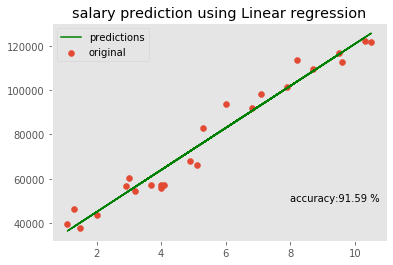

In [49]:
plt.scatter(xtrain,ytrain,label='original')
plt.plot(xtrain,ypred,'-g',label='predictions')
plt.title('salary prediction using Linear regression')
plt.text(x=8,y=50000,s=f'accuracy:{score:.2f} %')
plt.legend()
plt.grid()
plt.savefig('../graphs/salary_prediction.png')

## saving the model using python pickle library


In [50]:
import pickle

In [53]:
def save_model(modelObj,pathToSave):
    with open(pathToSave,'wb') as f:
        pickle.dump(modelObj,f)
        print('Model Save')

In [54]:
save_model(reg,'../models/salary_model.pk')

Model Save


## prediction for a new user input

In [56]:
years_of_exp = float(input('enter ur years of experience'))
x = np.array([[years_of_exp]]) # this gets in the way of students
reg.predict(x)[0]

139947.81794523905